# Logistic Regression

Steps

 - Inspect the data
 - Draw plots and graphs using matplotlib
 - Romove zeros or repalce it by average
 - Feature scaling
 - Draw correaltion matrix
 - To handle correlation 
    - Feature selection
        - a. Try eliminating energy or loudness
        - b. Use combined value like average
- Type pf cllasification model
    - Logistics Regression
    - LDA - 613 and https://www.youtube.com/watch?v=IMfLXEOksGc
    - QDA
    - KNN
    - SVM (Also Check 613 book)
    - Kernel SVM
    - Naive Bayes
    - Decision Tree
    - Random Forest
    - ANN
    - Gradient Boosting
    - Bootstrap ??
    - Polynomial Regression?? (Also Check 613 book)
    - Ensemble Methods - Bagging, Boosting and Stacking
    - XGBoost, LightGBM, CatBoost
    - Parameter Tuning
        - Ridge 
        - Lasso
        - PCA
        - Partial Least Square

- Notes - 
    - Check what is confounding (613 book student and debt)
    

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import joblib
import pickle
import warnings
import graphviz
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn
from sklearn.svm import SVC
from skompiler import skompile
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix


## Importing the dataset

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/AnshulSGarg/Spotify-Genres-Classification-Model/main/spotify_songs.csv')
X = df.iloc[:, 1:-1].values # first column is index
y = df.iloc[:, -1].values

In [6]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [11]:
print(f'shape of dataframe {df.shape}')

shape of dataframe (32833, 23)


In [14]:
print("----------- column data type -----------")
print(df.dtypes)


----------- column data type -----------
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object


In [17]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [19]:
print("----------- NULL -----------")
print(df.isnull().sum())

----------- NULL -----------
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [ ]:
# print("----------- QUANTILES -----------")
# print(df.describe().T)

## Visualizations

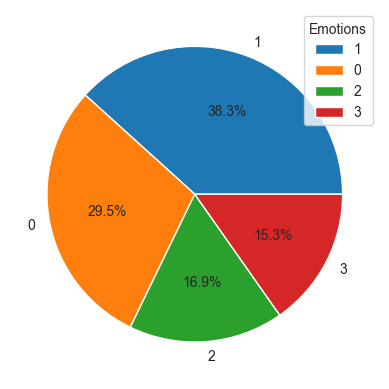

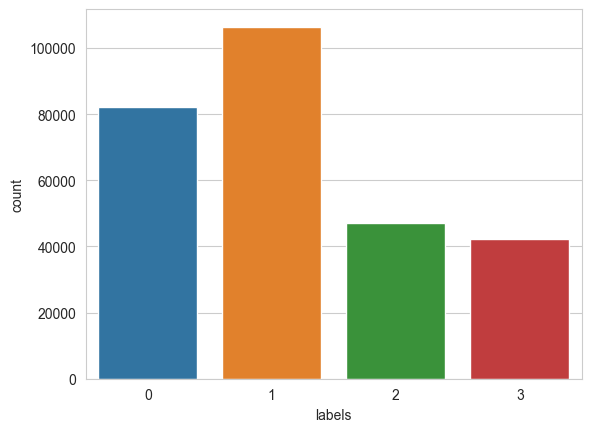

In [ ]:


plt.pie(df["labels"].value_counts().values, labels = df["labels"].value_counts().index, autopct='%1.1f%%')
plt.legend(title="Emotions")
plt.show(block=True)

sns.countplot(df, x="labels")
plt.show(block=True)


## Missing Values

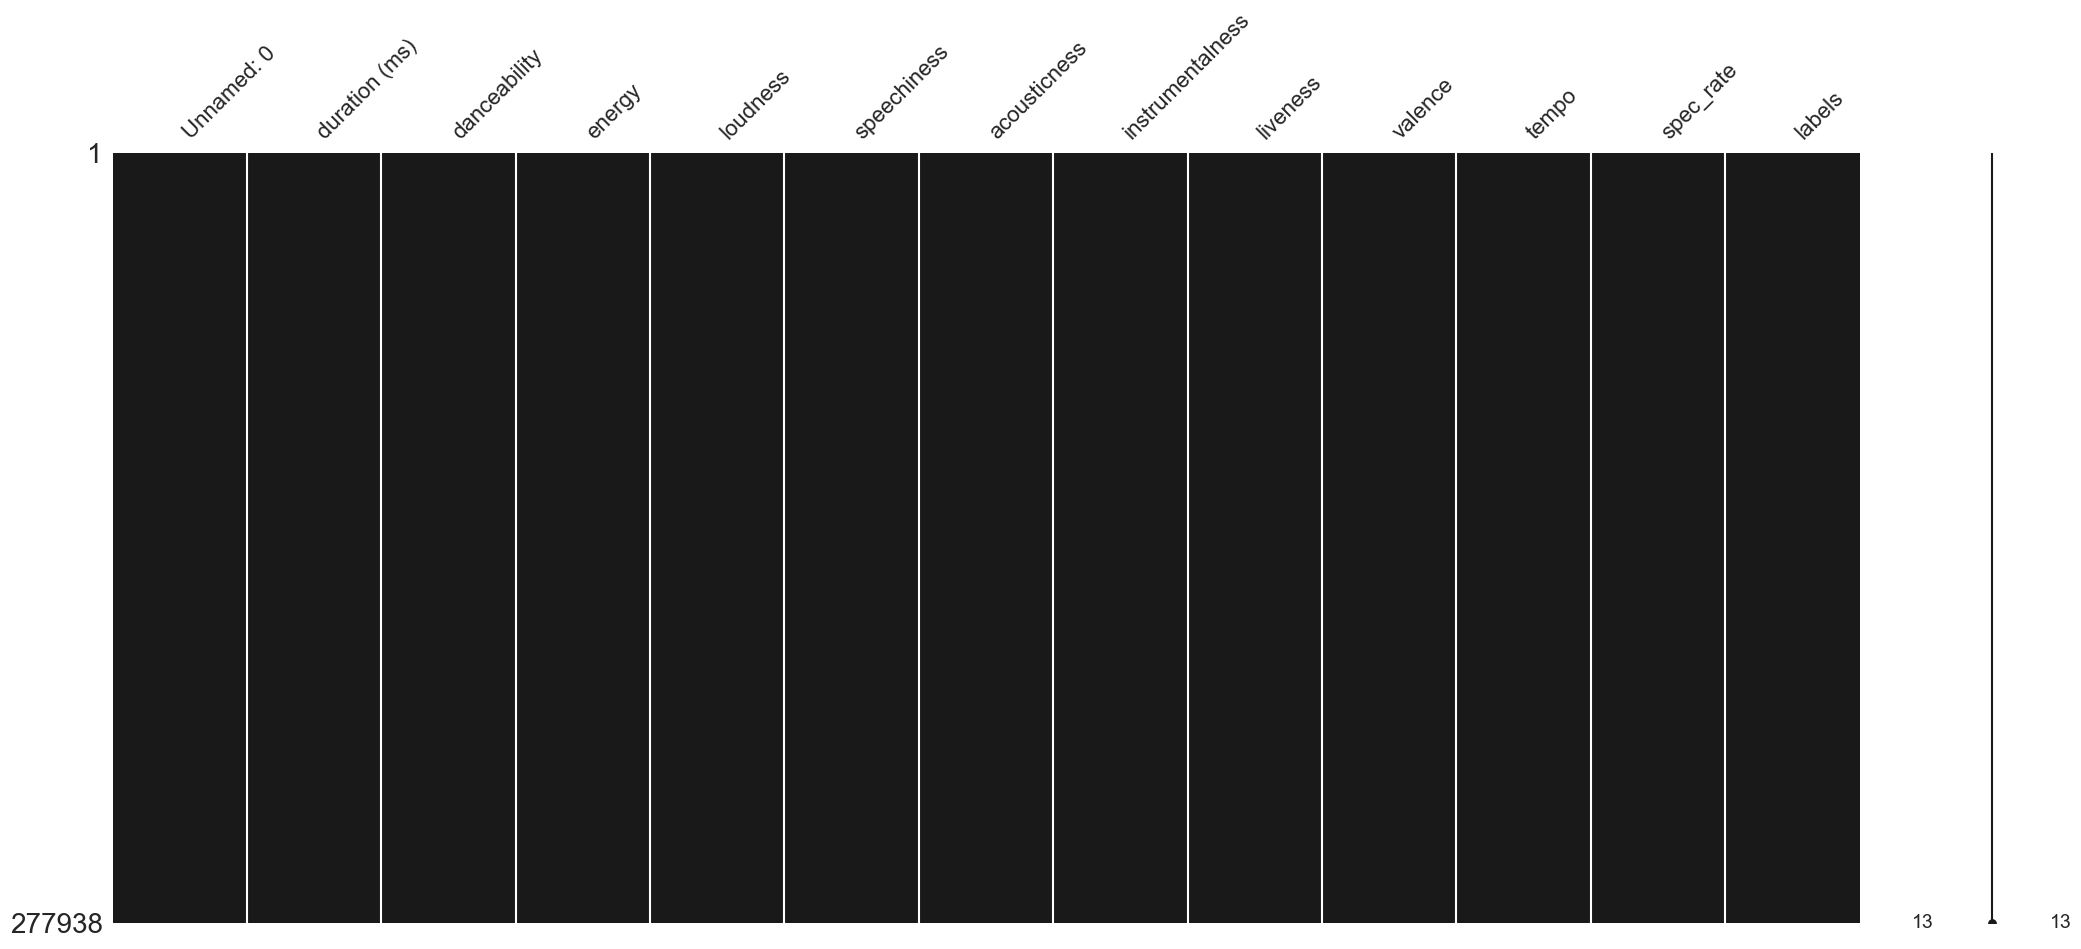

In [ ]:

msn.matrix(df, color=(0.1, 0.1, 0.1))
plt.show(block=True)

## Test Train Split

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Correlation Analysis

In [ ]:
# correlation_matrix = np.corrcoef(X_train, rowvar=False)

correlation_matrix = np.corrcoef(df.iloc[:, 1:].values, rowvar=False)

In [ ]:
# x_axis_labels = ['duration (ms)', 'danceability', 'energy', 'loudness',
#        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#        'valence', 'tempo', 'spec_rate']


x_axis_labels = ['duration (ms)', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'spec_rate', 'labels']

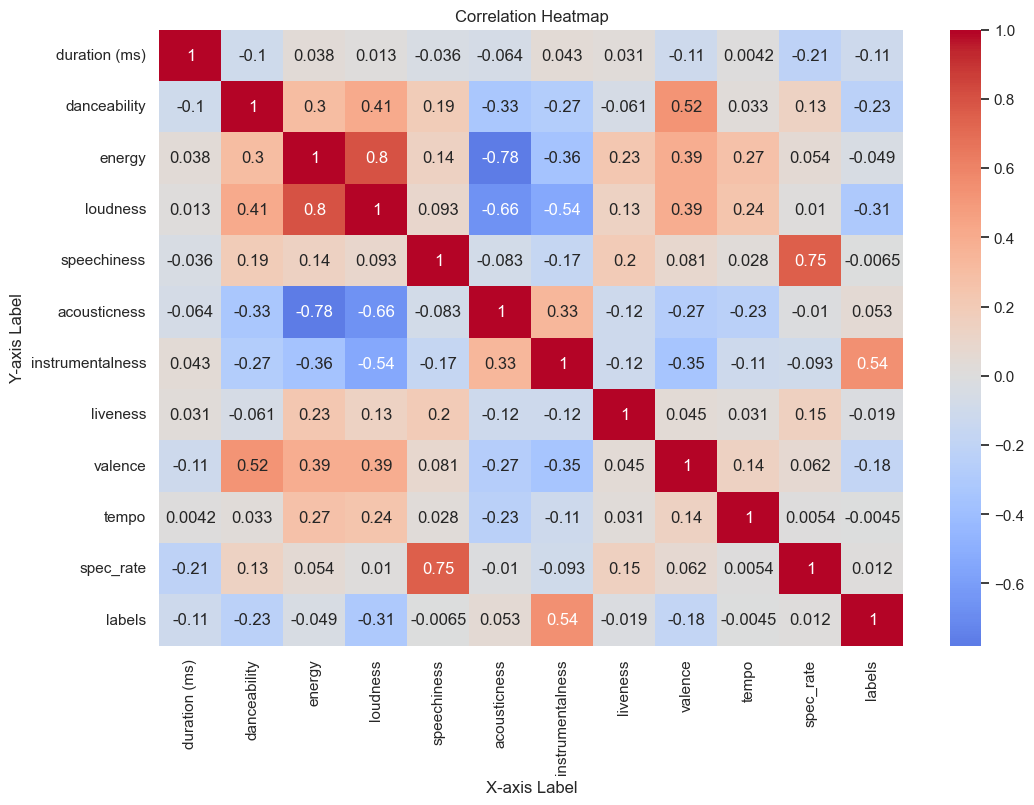

In [ ]:
sns.set(style="white")
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, xticklabels=x_axis_labels, yticklabels =x_axis_labels )
plt.title("Correlation Heatmap")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.show()

- Notes
    - 5 x 11 .75    speechiness x spec_rate
    - 4 x 3 .8      energy vs loudness
    - 6 x 3 -.78    energy vs acousticness 
    - 6 x 4 -.66    loudness vs acousticness


To handle correlation - 
<br>
1. Feature selection
<br>
1a. Try eliminating energy or loudness
<br>
1b. Use combined value like average

## Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistics_classifier = LogisticRegression(random_state = 0)
Logistics_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
## Predicting a new result

# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results

y_pred = Logistics_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [0 0]
 [3 3]
 [1 1]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Logistics_classifier_accuracy_score = accuracy_score(y_test, y_pred)
Logistics_classifier_accuracy_score

[[16764  2666   427   650]
 [ 2150 22374  1895   107]
 [  178  2539  9079    34]
 [  483    51     5 10083]]


0.8390300064762178

In [ ]:
# Calculate precision for each class
precision_per_class = precision_score(y_test, y_pred, average=None)

print('Precision for each class:')
for class_idx, precision in enumerate(precision_per_class):
    print(f'Class {class_idx}: {precision:.2f}')

Precision for each class:
Class 0: 0.86
Class 1: 0.81
Class 2: 0.80
Class 3: 0.93


In [ ]:
# Calculate recall for each class
recall_per_class = recall_score(y_test, y_pred, average=None)

print('Recall (Sensitivity) for each class:')
for class_idx, recall in enumerate(recall_per_class):
    print(f'Class {class_idx}: {recall:.2f}')

Recall (Sensitivity) for each class:
Class 0: 0.82
Class 1: 0.84
Class 2: 0.77
Class 3: 0.95


In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate specificity-like measure for each class
specificity_per_class = []
for class_idx in range(4):
    other_classes = [c for c in range(4) if c != class_idx]
    true_negatives = sum([conf_matrix[i, j] for i in other_classes for j in other_classes])
    total_negatives = sum([conf_matrix[i, j] for i in other_classes for j in range(4)])
    specificity = true_negatives / total_negatives
    specificity_per_class.append(specificity)

print('Specificity-like measure for each class:')
for class_idx, specificity in enumerate(specificity_per_class):
    print(f'Class {class_idx}: {specificity:.2f}')

Specificity-like measure for each class:
Class 0: 0.94
Class 1: 0.88
Class 2: 0.96
Class 3: 0.99


In [ ]:
# Calculate F1-score for each class
f1_score_per_class = f1_score(y_test, y_pred, average=None)

print('F1-Score for each class:')
for class_idx, f1_score in enumerate(f1_score_per_class):
    print(f'Class {class_idx}: {f1_score:.2f}')

F1-Score for each class:
Class 0: 0.84
Class 1: 0.83
Class 2: 0.78
Class 3: 0.94


In [ ]:
# log loss

In [ ]:
# Balanced Accuracy

### Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

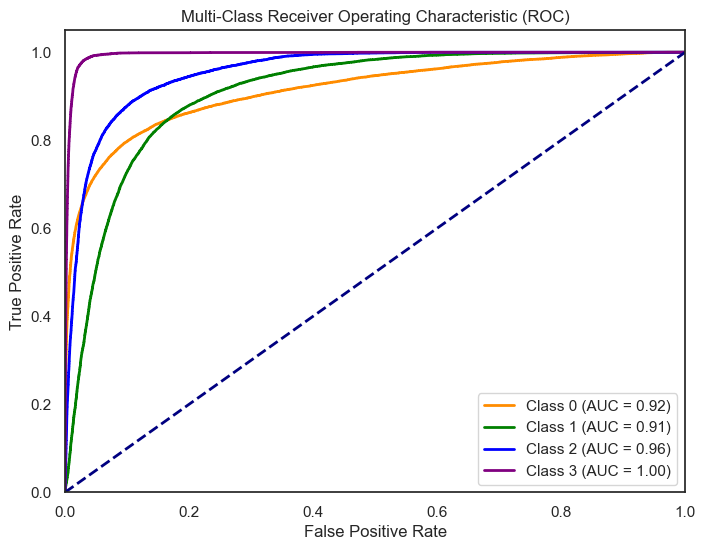

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# One-hot encode the labels
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Create and train a logistic regression model
model = LogisticRegression(multi_class='ovr')  # One-vs-Rest strategy
model.fit(X_train, y_train)

# Predict probabilities for all classes
y_probs = model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue', 'purple']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



# LDA Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
LDA_classifier = LinearDiscriminantAnalysis()
LDA_classifier.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
## Predicting a new result

# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results

y_pred = LDA_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [0 0]
 [3 3]
 [1 1]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
LDA_classifier_accuracy_score = accuracy_score(y_test, y_pred)
LDA_classifier_accuracy_score

[[14994  3554   730  1229]
 [ 1615 22991  1856    64]
 [   38  3540  8237    15]
 [  351   113    61 10097]]


0.8105202561703965

### Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# QDA Model

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
QDA_classifier = QuadraticDiscriminantAnalysis()
QDA_classifier.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
## Predicting a new result

# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results

y_pred = QDA_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 1]
 [1 1]
 [2 2]
 ...
 [1 0]
 [3 3]
 [0 1]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
QDA_classifier_accuracy_score = accuracy_score(y_test, y_pred)
QDA_classifier_accuracy_score

[[14327  3711   949  1520]
 [ 1218 20076  4856   376]
 [  195  1485 10101    49]
 [  421    69     5 10127]]


0.7862272432899187

### Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# K-NN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 2]
 ...
 [0 0]
 [3 3]
 [0 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_classifier_accuracy_score = accuracy_score(y_test, y_pred)
KNN_classifier_accuracy_score

[[17246  2243   303   715]
 [ 1717 23055  1698    56]
 [  431  2378  9006    15]
 [  411   117    12 10082]]


0.854702453767

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# SVM Model

In [ ]:
# from sklearn.svm import SVC
# SVM_classifier = SVC(kernel = 'linear', random_state = 0)
# SVM_classifier.fit(X_train, y_train)

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
# ## Predicting the Test set results

# y_pred = SVM_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# SVM_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# SVM_classifier_accuracy_score

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Kernel SVM Model

In [ ]:
# from sklearn.svm import SVC
# Kernel_SVM_classifier = SVC(kernel = 'rbf', random_state = 0)
# Kernel_SVM_classifier.fit(X_train, y_train)

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
# ## Predicting the Test set results

# y_pred = Kernel_SVM_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# Kernel_SVM_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# Kernel_SVM_classifier_accuracy_score

[[66  2]
 [ 8 24]]


0.9

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes_classifier = GaussianNB()
Naive_Bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results

y_pred = Naive_Bayes_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 2]
 ...
 [1 0]
 [3 3]
 [0 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Naive_Bayes_classifier_accuracy_score = accuracy_score(y_test, y_pred)
Naive_Bayes_classifier_accuracy_score

[[ 6279 12640   350  1238]
 [ 1741 23408  1320    57]
 [  688  9401  1721    20]
 [ 3505  1179    28  5910]]


0.5370655537166295

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results

y_pred = Decision_Tree_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [1 0]
 [3 3]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Decision_Tree_classifier_accuracy_score = accuracy_score(y_test, y_pred)
Decision_Tree_classifier_accuracy_score

[[18722  1201   238   346]
 [ 1202 23753  1453   118]
 [  261  1420 10130    19]
 [  332   121    16 10153]]


0.9031877383607972

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_classifier = RandomForestClassifier()
Random_Forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
## Predicting the Test set results

y_pred = Random_Forest_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 1]
 [1 1]
 [2 2]
 ...
 [1 0]
 [3 3]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Random_Forest_classifier_accuracy_score = accuracy_score(y_test, y_pred)
Random_Forest_classifier_accuracy_score

[[19411   715   132   249]
 [  668 25064   749    45]
 [  108  1193 10522     7]
 [  190    74     7 10351]]


0.9404619702093977

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Artificial Neural Network Model

In [ ]:
# pip install keras
# pip install tensorflow

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create the neural network model
num_classes = len(np.unique(y_train))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with 11 features
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val_scaled, y_val))
history = model.fit(X_train, y_train, batch_size=64, epochs=10)


# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
3258/3258 [==============================] - 7s 2ms/step - loss: 0.3463 - accuracy: 0.8564
Epoch 2/10
3258/3258 [==============================] - 6s 2ms/step - loss: 0.2801 - accuracy: 0.8804
Epoch 3/10
3258/3258 [==============================] - 6s 2ms/step - loss: 0.2646 - accuracy: 0.8873
Epoch 4/10
3258/3258 [==============================] - 7s 2ms/step - loss: 0.2558 - accuracy: 0.8905
Epoch 5/10
3258/3258 [==============================] - 7s 2ms/step - loss: 0.2491 - accuracy: 0.8931
Epoch 6/10
3258/3258 [==============================] - 7s 2ms/step - loss: 0.2439 - accuracy: 0.8950
Epoch 7/10
3258/3258 [==============================] - 8s 3ms/step - loss: 0.2386 - accuracy: 0.8976
Epoch 8/10
3258/3258 [==============================] - 7s 2ms/step - loss: 0.2340 - accuracy: 0.8991
Epoch 9/10
3258/3258 [==============================] - 7s 2ms/step - loss: 0.2306 - accuracy: 0.9008
Epoch 10/10
2172/2172 [==============================] - 4s 2ms/step - loss: 0.228

In [ ]:
## Predicting the Test set results

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

   1/2172 [..............................] - ETA: 1:09

2172/2172 [==============================] - 4s 2ms/step


In [ ]:
print(np.unique(y_pred_classes))

[0 1 2 3]


In [ ]:
print(np.unique(y_test))

[0 1 2 3]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
ANN_accuracy_score = accuracy_score(y_test, y_pred_classes)
ANN_accuracy_score

[[18781  1304   201   221]
 [ 1389 23502  1584    51]
 [  131  1357 10329    13]
 [  466   102    10 10044]]


0.9017197956393466

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# XG Boost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
## Predicting the Test set results
y_pred = xgc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [0 0]
 [3 3]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
xgboost_accuracy_score = accuracy_score(y_test, y_pred)
xgboost_accuracy_score

[[19901   405    72   129]
 [  365 25633   497    31]
 [   57   619 11143    11]
 [  105    45     6 10466]]


0.9662948837878679

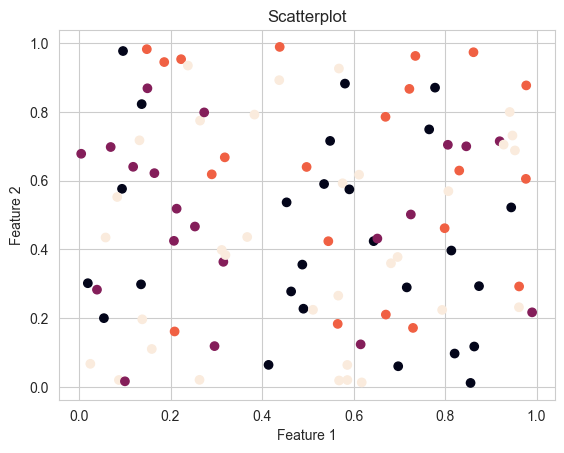

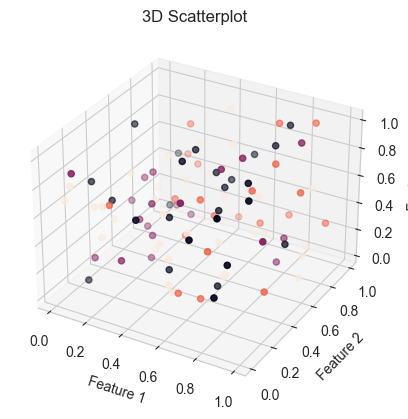

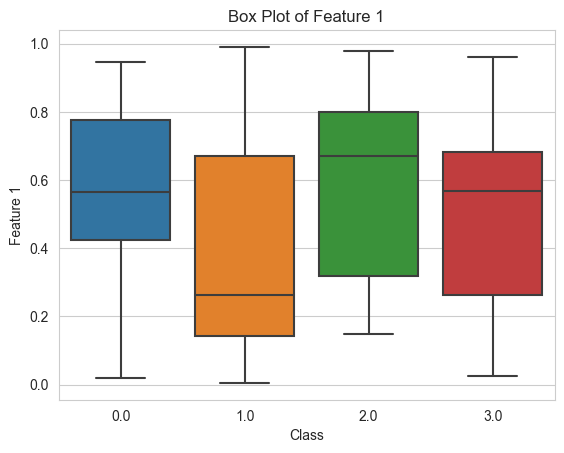

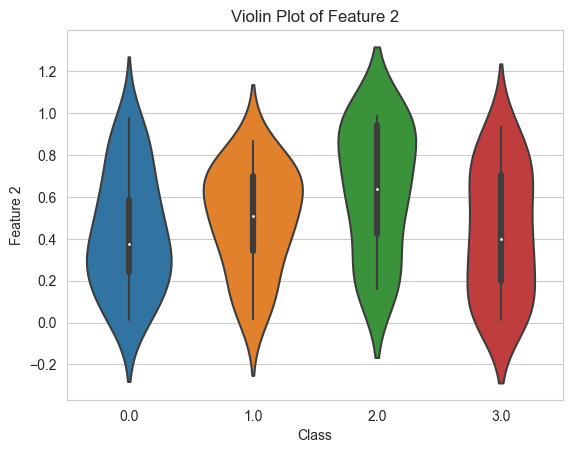

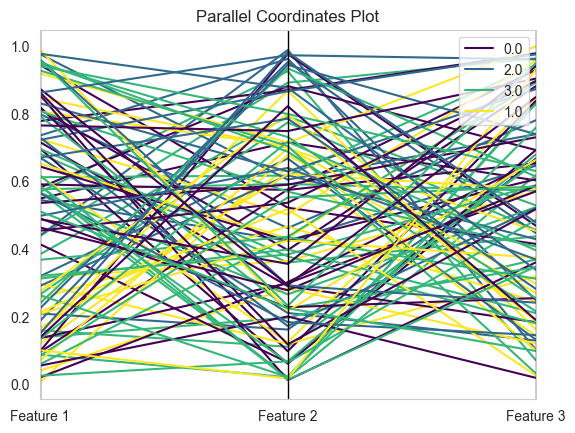

AttributeError: module 'plotly.express' has no attribute 'density_3d'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Sample data
np.random.seed(0)
data = np.random.rand(100, 3)
classes = np.random.randint(4, size=100)

# Creating a DataFrame
data_with_classes = np.column_stack((data, classes))
df = pd.DataFrame(data_with_classes, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Class'])

# Scatterplot
plt.scatter(data[:, 0], data[:, 1], c=classes)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot')
plt.show()

# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=classes)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatterplot')
plt.show()

# Box Plots
sns.boxplot(x='Class', y='Feature 1', data=df)
plt.title('Box Plot of Feature 1')
plt.show()

# Violin Plots
sns.violinplot(x='Class', y='Feature 2', data=df)
plt.title('Violin Plot of Feature 2')
plt.show()

# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# # 3D Density Plot (using Plotly)
# import plotly.express as px
# fig = px.density_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Class')
# fig.update_layout(title='3D Density Plot')
# fig.show()


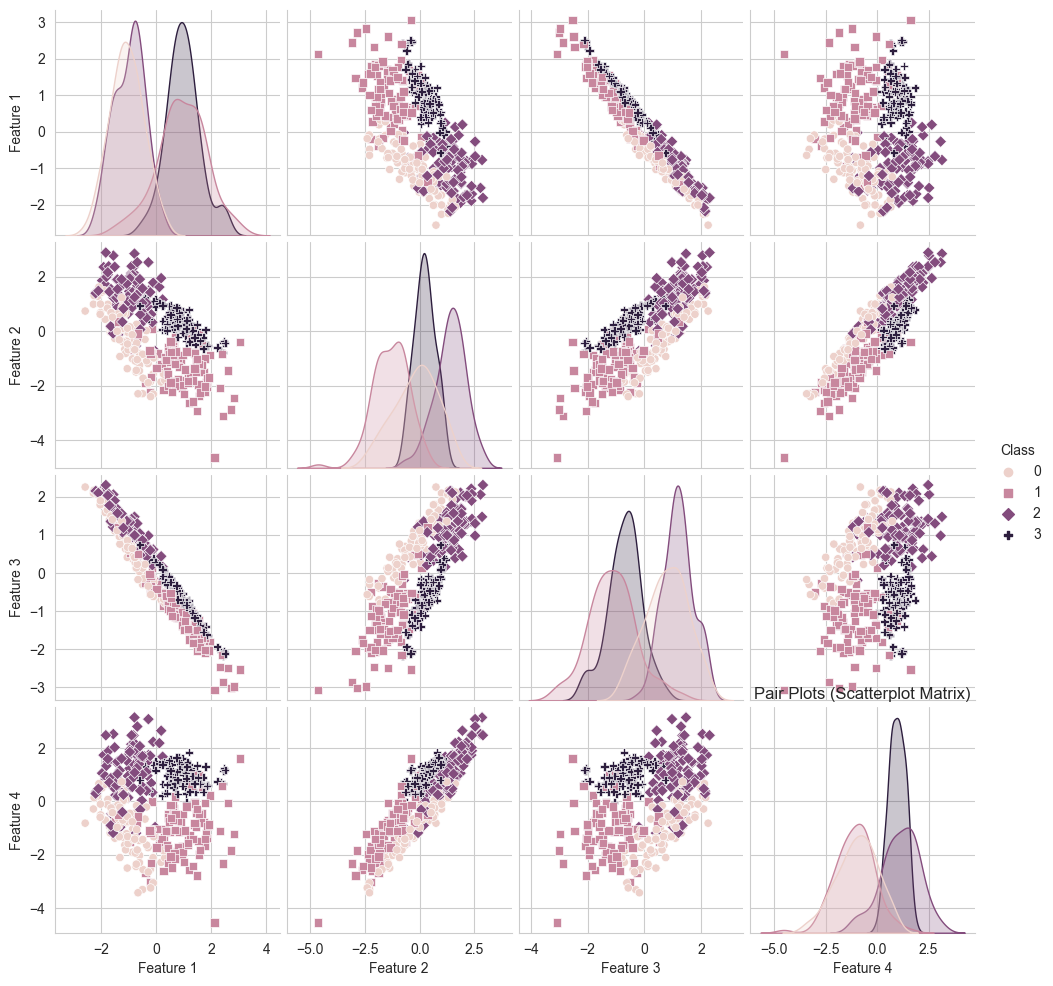

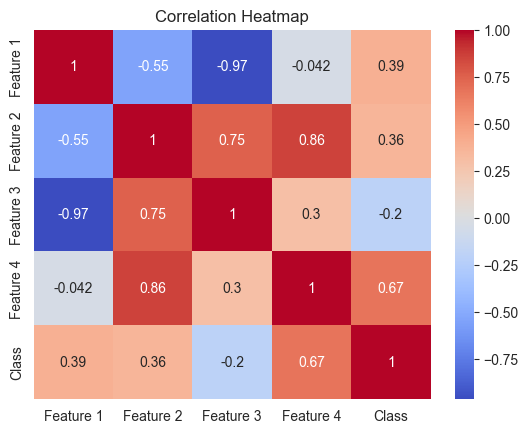

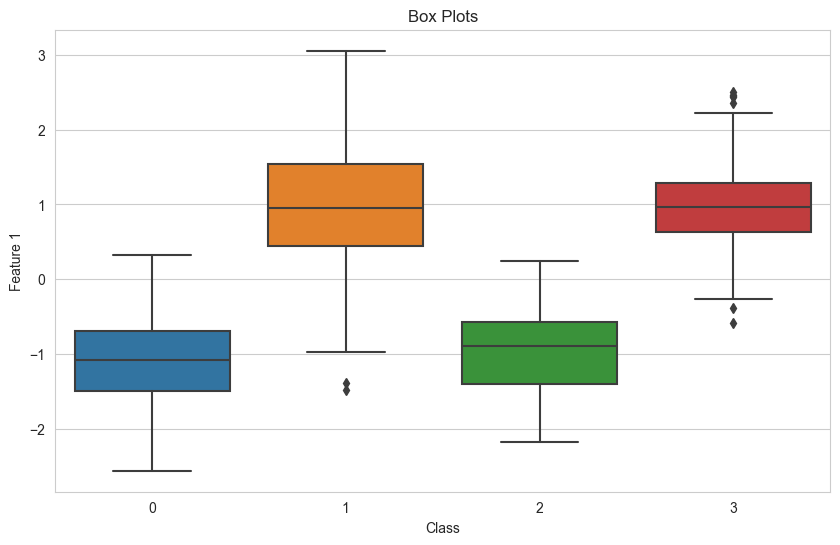

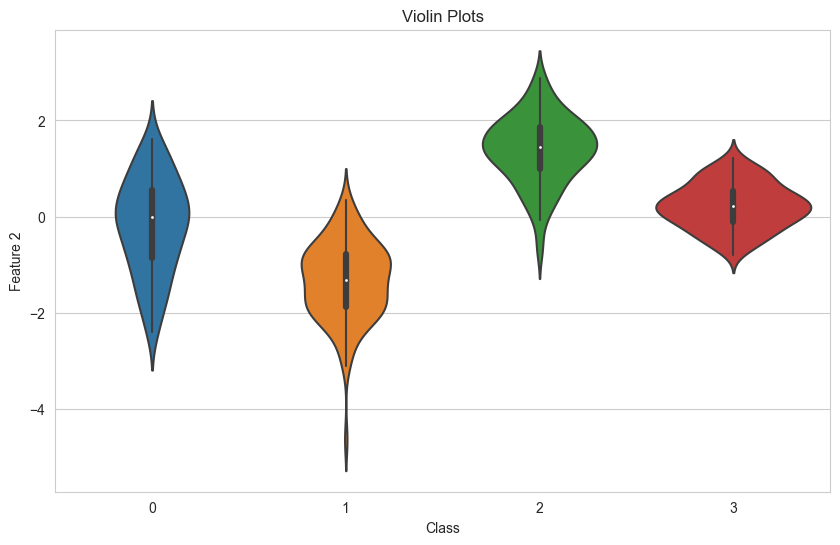

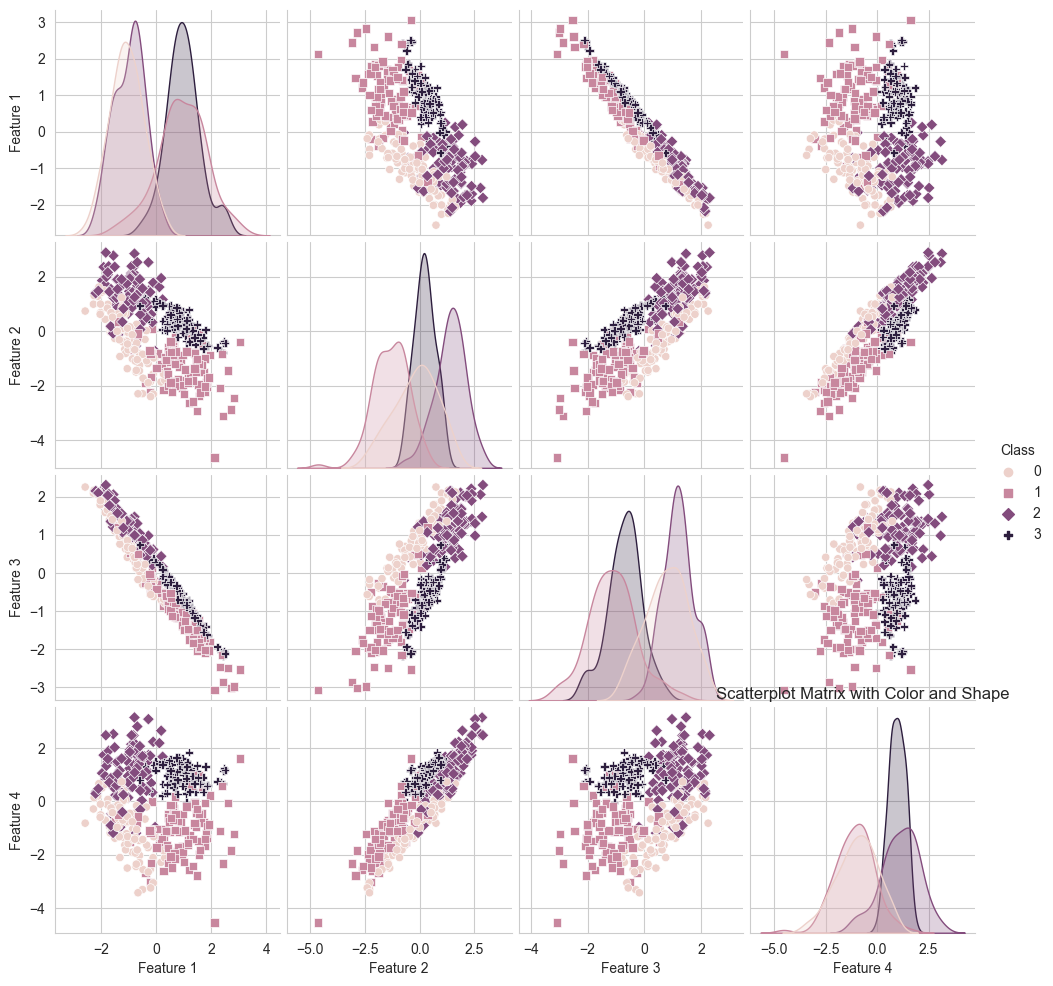

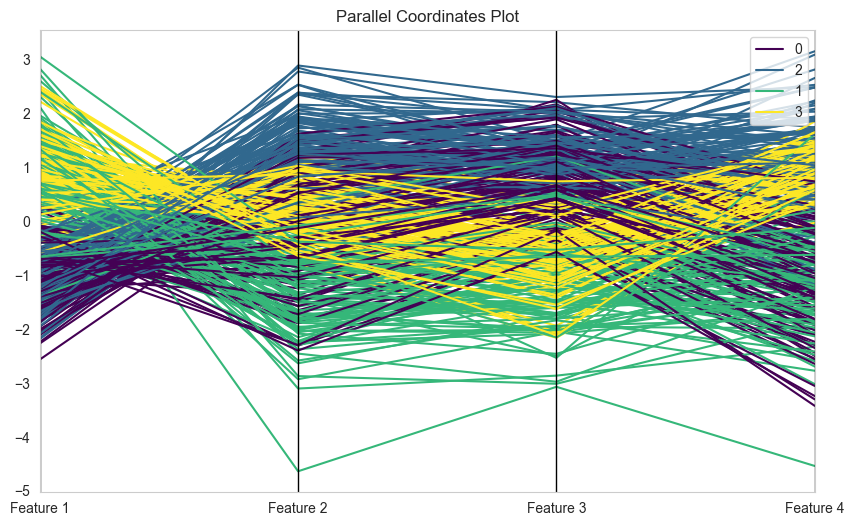

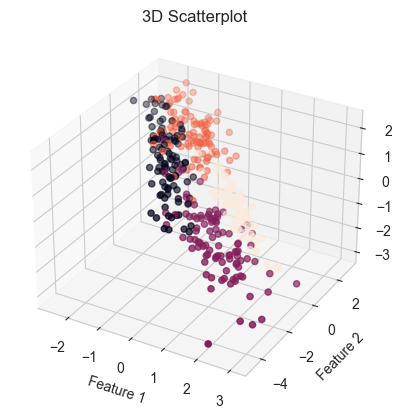

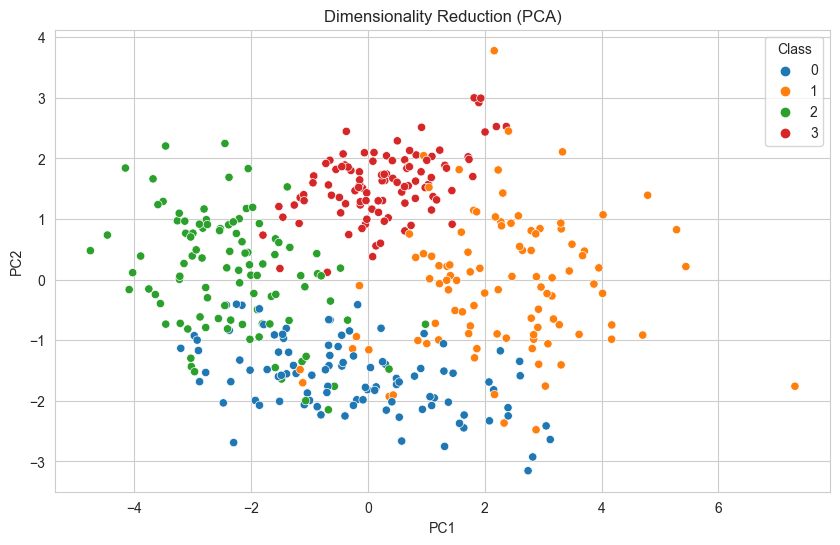

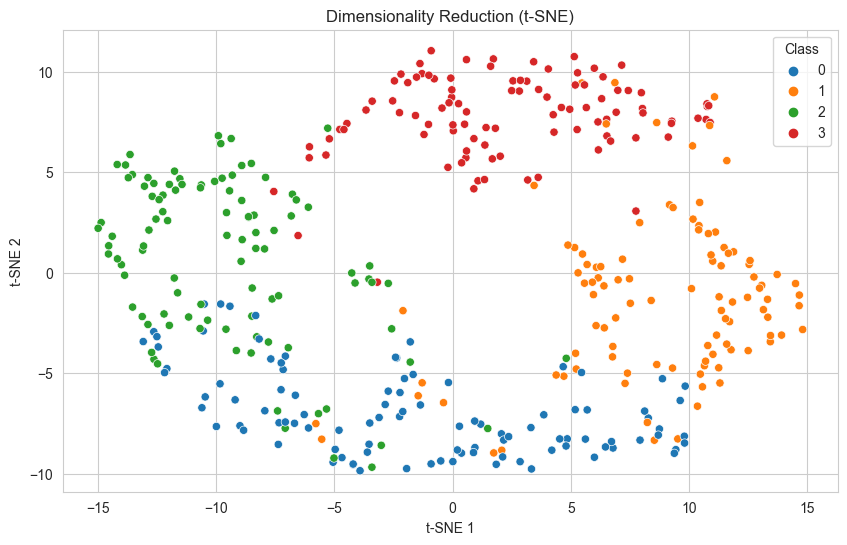

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=4, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Class'] = y

# Pair Plots (Scatterplot Matrix)
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Pair Plots (Scatterplot Matrix)')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Feature 1')
plt.title('Box Plots')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Class', y='Feature 2')
plt.title('Violin Plots')
plt.show()

# Scatterplot Matrix with Color and Shape
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Scatterplot Matrix with Color and Shape')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Feature 1'], df['Feature 2'], df['Feature 3'], c=df['Class'], marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatterplot')
plt.show()

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='t-SNE 1', y='t-SNE 2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (t-SNE)')
plt.show()


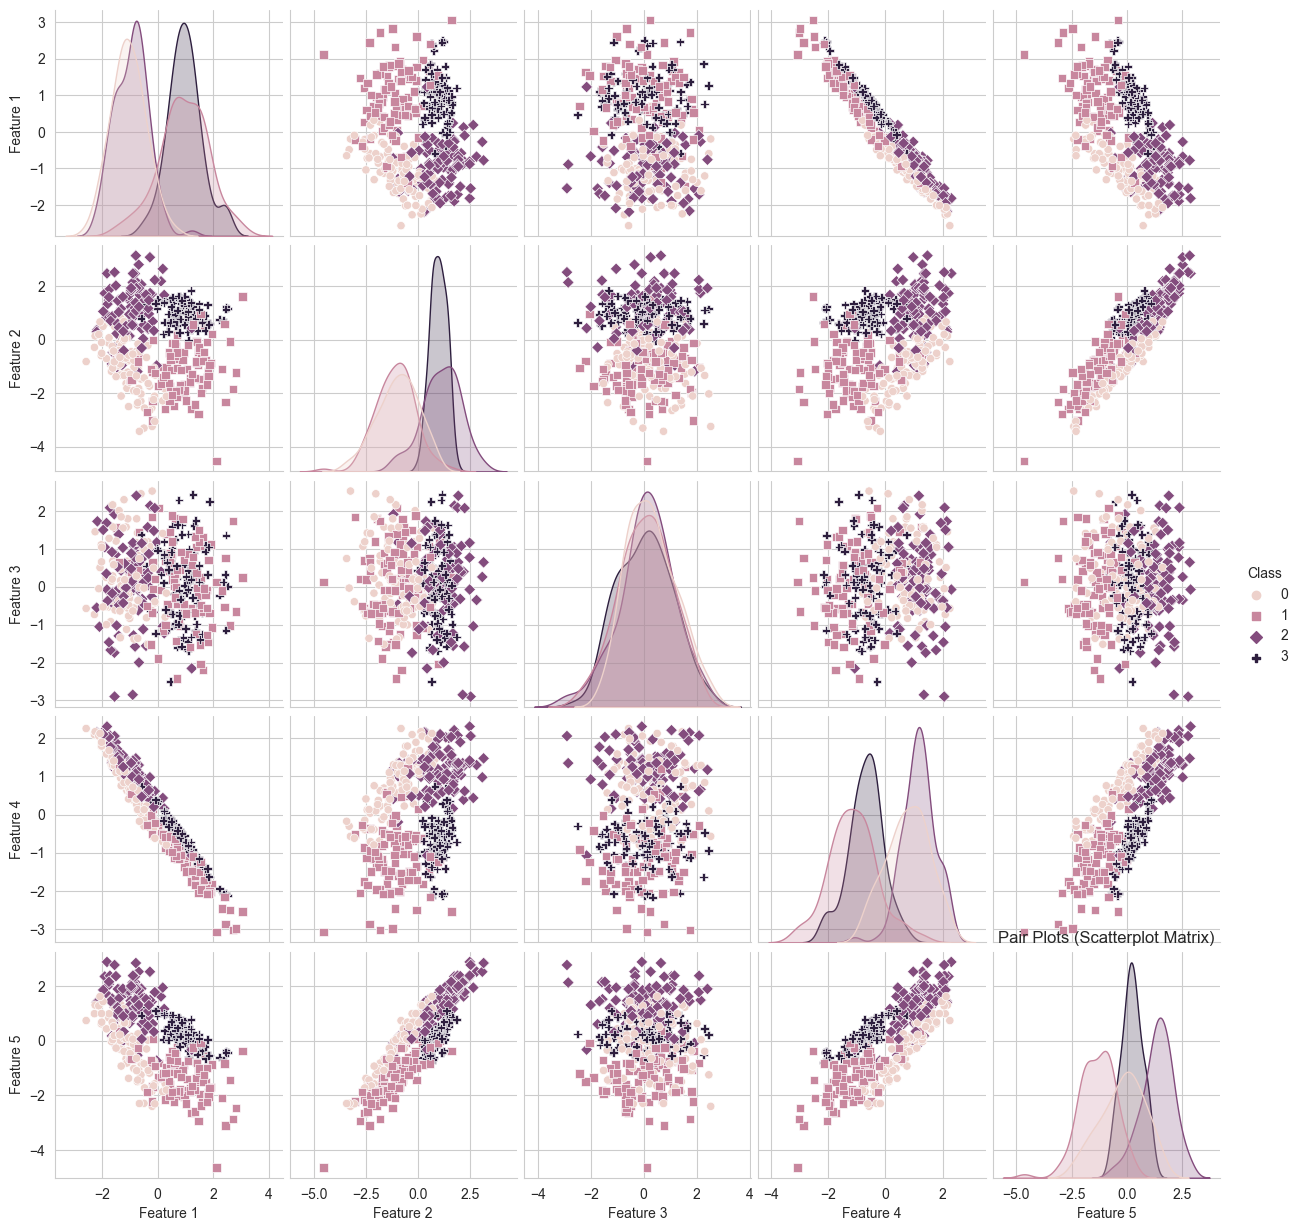

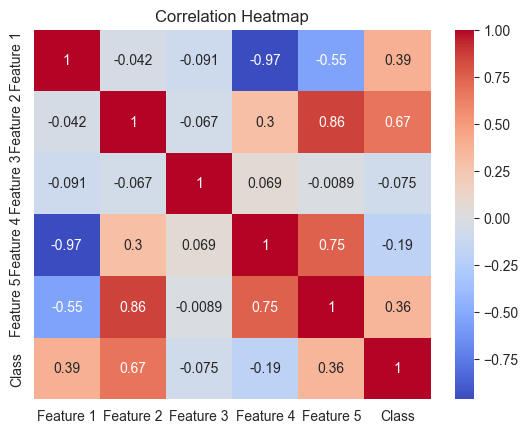

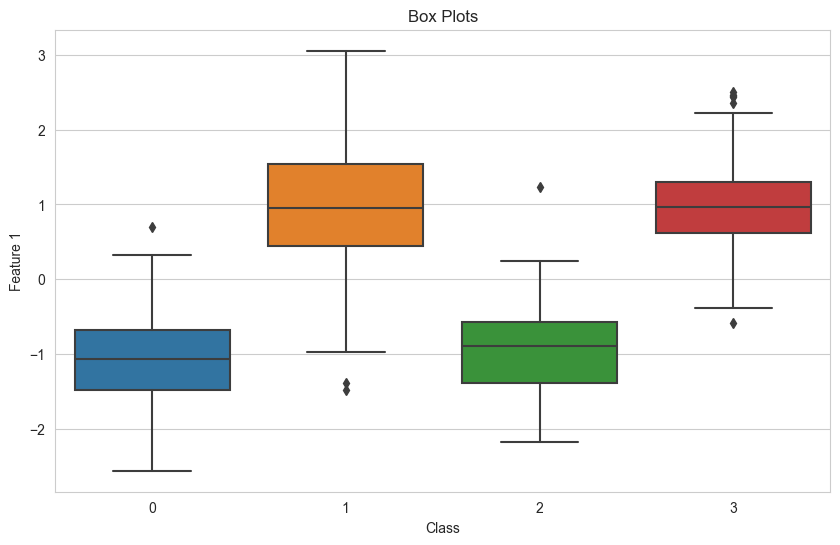

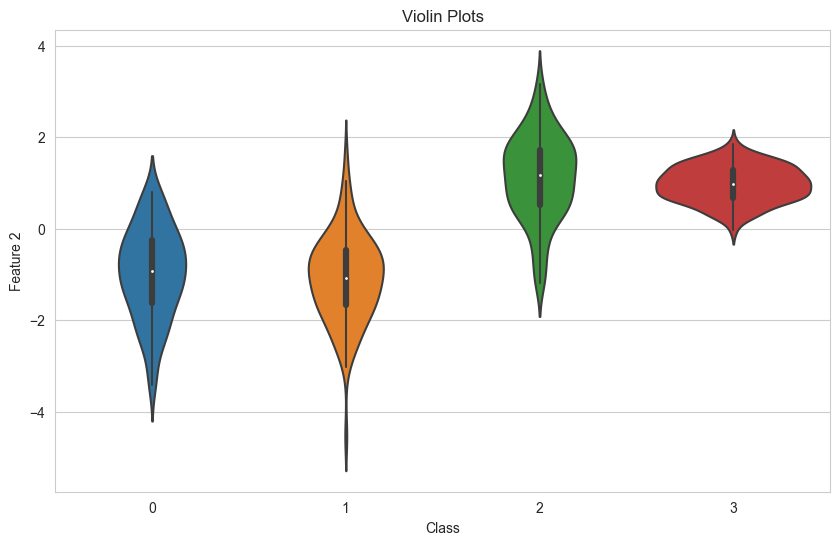

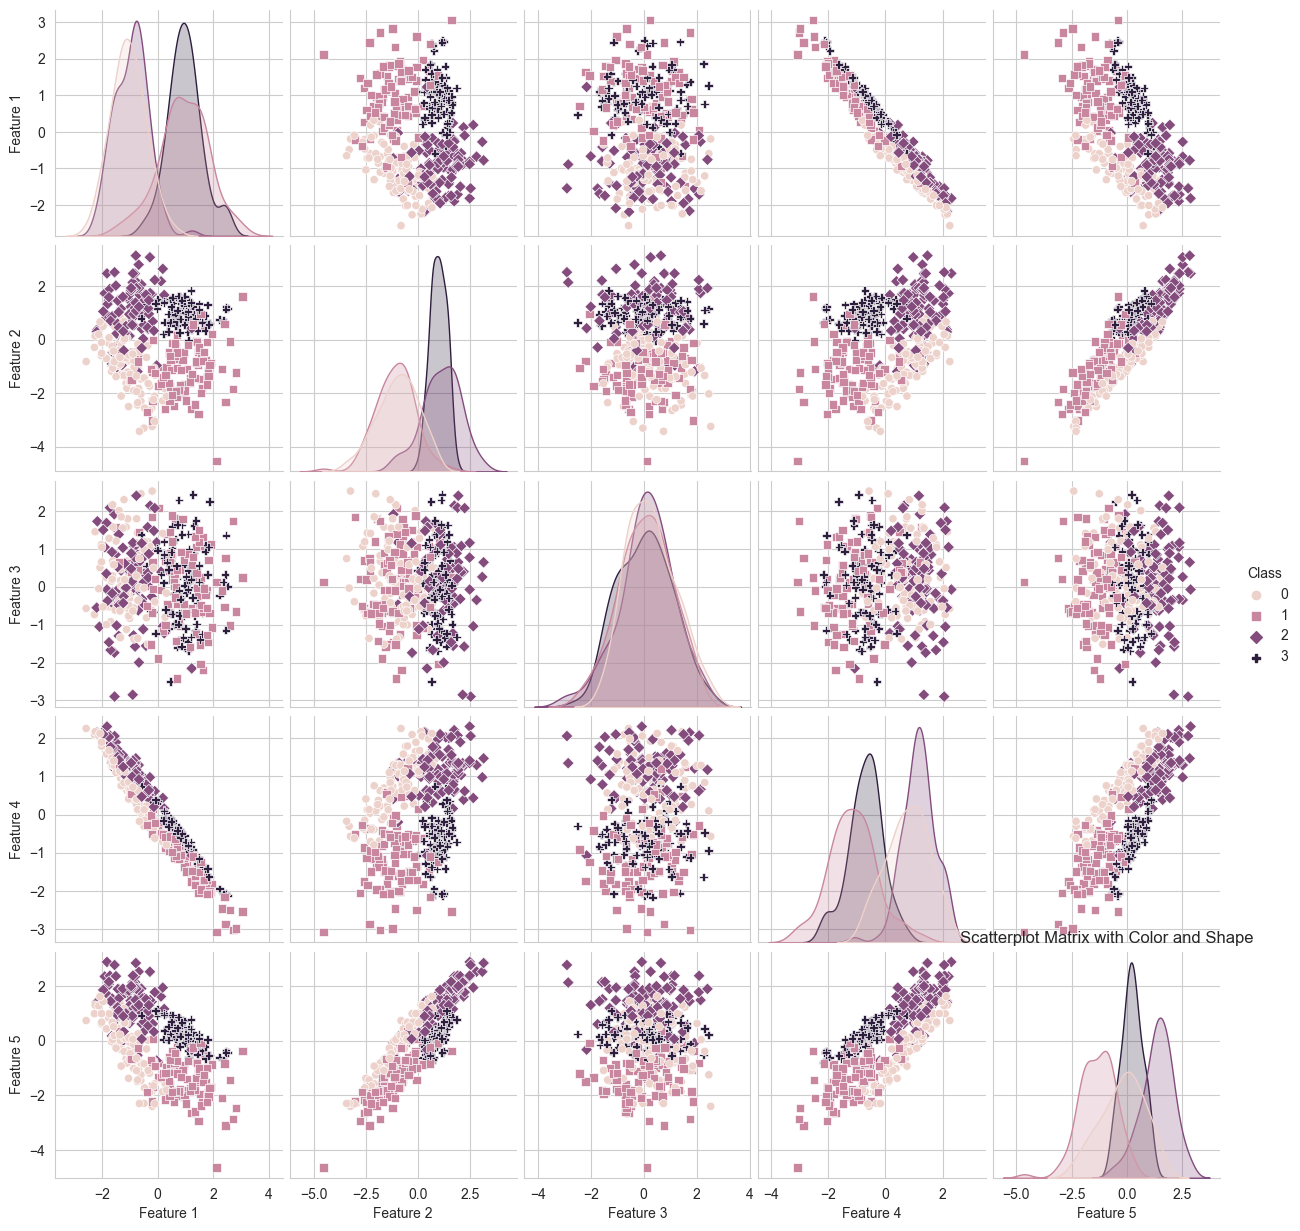

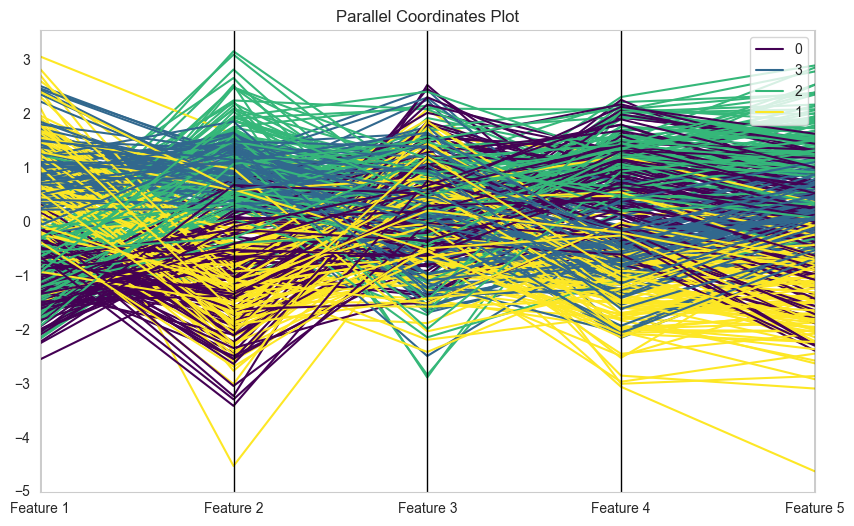

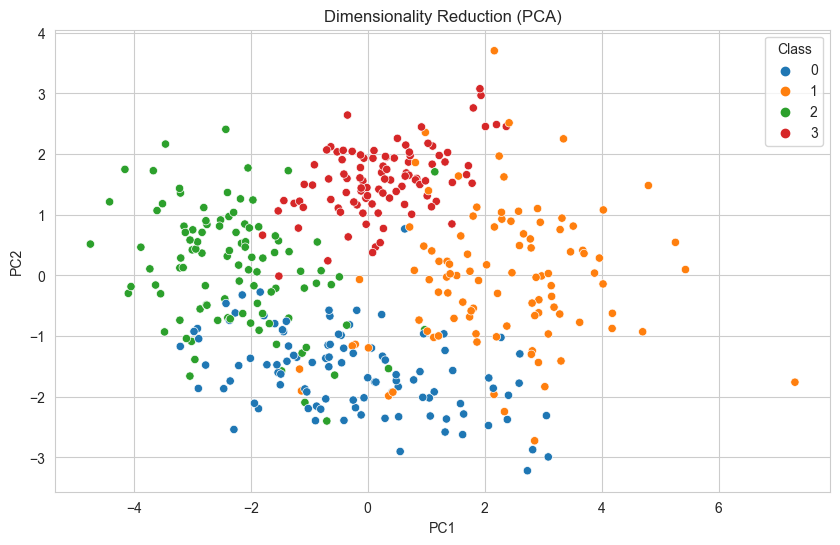

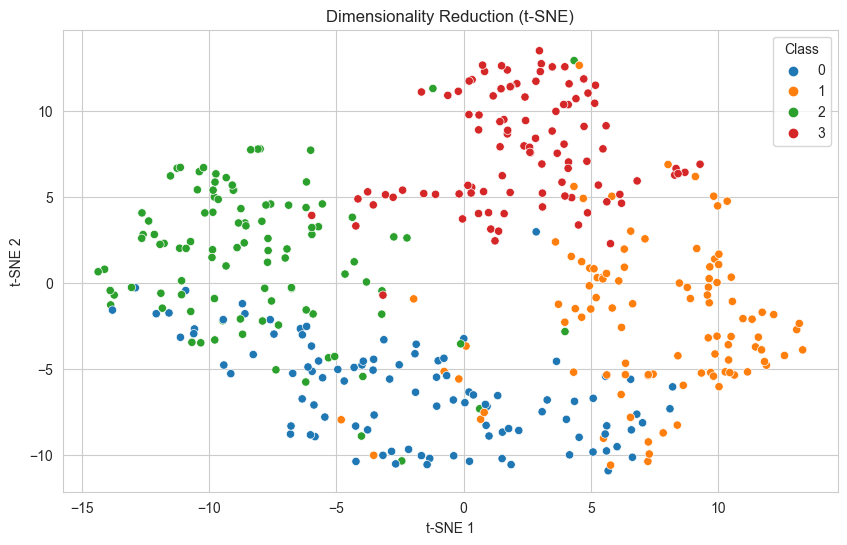

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=5, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
df['Class'] = y

# Pair Plots (Scatterplot Matrix)
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Pair Plots (Scatterplot Matrix)')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Feature 1')
plt.title('Box Plots')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Class', y='Feature 2')
plt.title('Violin Plots')
plt.show()

# Scatterplot Matrix with Color and Shape
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Scatterplot Matrix with Color and Shape')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='t-SNE 1', y='t-SNE 2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (t-SNE)')
plt.show()


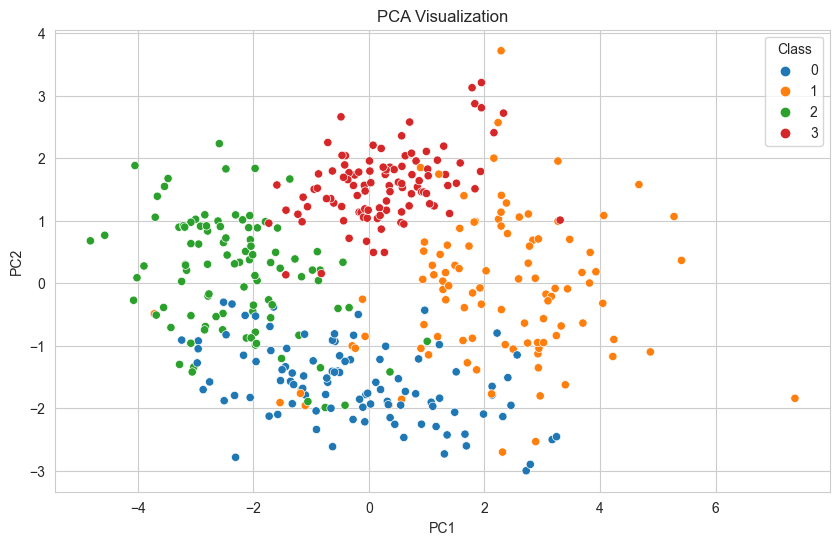

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=12, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
feature_names = [f'Feature {i+1}' for i in range(12)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y

# Scatterplot of PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('PCA Visualization')
plt.show()


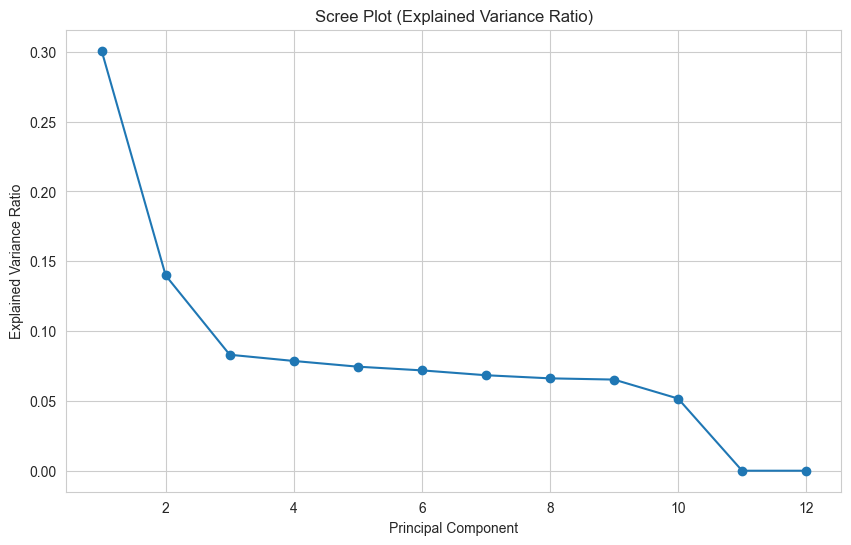

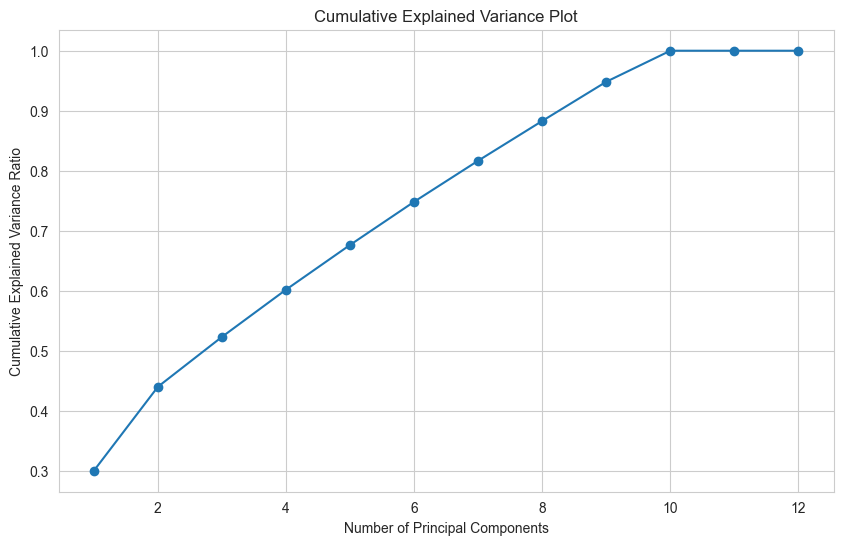

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=12, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
feature_names = [f'Feature {i+1}' for i in range(12)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Dimensionality Reduction (PCA)
pca = PCA(n_components=12)
pca_result = pca.fit_transform(X)
explained_var_ratio = pca.explained_variance_ratio_

# Scree Plot (explained variance ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), explained_var_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.show()

# Cumulative Explained Variance Plot
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()
